# Circulations Observed during NDJF 2015-16

The purpose of this notebook is to plot the climatology of rainfall and circulation patterns, and to plot the anomalies that occurred during NDJF 2015-16.

In [1]:
import numpy as np
import xarray as xr
import calendar
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import paraguayfloodspy.visualize as viz # custom plotting library
from paraguayfloodspy.xrutil import *
%matplotlib inline

Define the extents to use for these plots

In [2]:
rain_extent = [275, 330, 5, -45]
my_extent = [-140,10,-60,10]
months_plot = [11, 12, 1, 2]
years_plot = [2015,2015,2016,2016]
savefigs = True

Get some consistent color schemes

In [3]:
cmap_streamfunc = 'PuOr'
cmap_streamfunc_a = 'PuOr'
cmap_rain = 'Greens'
cmap_raina = 'BrBG'

Read in the raw data

In [4]:
psi = xr.open_dataset('../data/derived/psi_850.nc')
prcp = xr.open_dataset('../data/derived/precip.nc')

Get the X and Y coordinates for plotting

In [5]:
X, Y = np.meshgrid(psi.lon, psi.lat)
Xp, Yp = np.meshgrid(prcp.lon, prcp.lat)
ncols = len(months_plot)

## Plot Anomalies

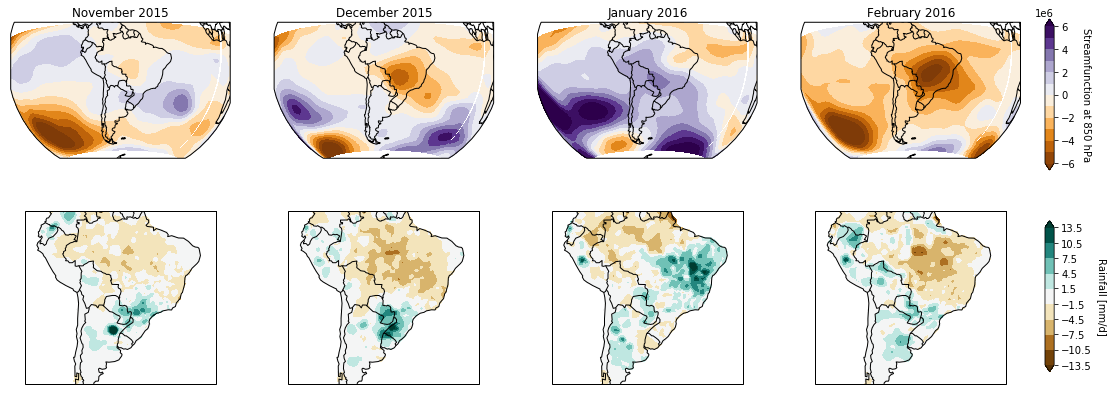

In [6]:
fig, axes = viz.SetupAxes(ncol = ncols, nax = 2 * ncols, proj = ccrs.Orthographic(-60, -10), figsize = [17, 7])
fig.subplots_adjust(right=0.95)
cax1 = fig.add_axes([0.97, 0.55, 0.0075, 0.3])
cax2 = fig.add_axes([0.97, 0.15, 0.0075, 0.3])
for i,m in enumerate(months_plot):
    def selector(ds):
        ds = ds.sel(time = slice('2015-11-01', '2016-02-28'))
        ds = ds.sel(time = (ds['time.month'] == m)).mean(dim='time')
        return(ds)

    # 850 hPa wind
    ax = axes[0, i]
    ax.set_title('{} {}'.format(calendar.month_name[m], years_plot[i]))
    C1 = ax.contourf(X, Y, selector(psi['anomaly']), transform = ccrs.PlateCarree(), 
                     cmap = cmap_streamfunc_a, levels=np.linspace(-6e6, 6e6, 13), extend='both')

    # Row 3: Rainfall
    ax = axes[1, i]
    sub = selector(prcp['anomaly']).values
    sub = np.ma.masked_invalid(sub)
    C2 = ax.contourf(Xp, Yp, sub, transform = ccrs.PlateCarree(), cmap = cmap_raina, 
                     levels = np.linspace(-13.5, 13.5, 10), extend = "both")

# Colorbars for Reanalysis Data
cbar1 = fig.colorbar(C1, cax = cax1)
cbar1.formatter.set_powerlimits((6, 6))
cbar1.update_ticks() 
cbar1.set_label(r'Streamfunction at 850 hPa', rotation=270)
cbar1.ax.get_yaxis().labelpad = 15
# Colorbar for Rainfall
cbar2 = fig.colorbar(C2, cax=cax2)
cbar2.set_label(r'Rainfall [mm/d]', rotation=270)
cbar2.ax.get_yaxis().labelpad = 15
# Coasts and Countries
viz.FormatAxes(axes[0,:], coast=True, grid=False, border=True, river = False,
               feature_list = [], states=False, extent = my_extent, ticks=None)
viz.FormatAxes(axes[1,:], coast=True, grid=False, border=True, river = False,
               feature_list = [], states=False, extent = rain_extent, ticks=None)
# Save to File
if savefigs:
    fig.savefig("../figs/NDJF201516Anomaly.pdf", bbox_inches='tight')

## Plot Full Values

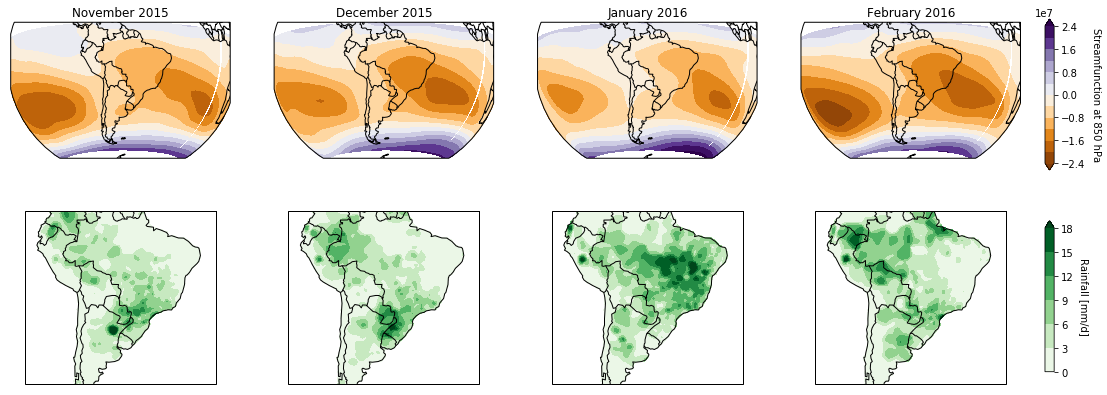

In [7]:
fig, axes = viz.SetupAxes(ncol = ncols, nax = 2 * ncols, proj = ccrs.Orthographic(-60, -10), figsize = [17, 7])
fig.subplots_adjust(right=0.95)
cax1 = fig.add_axes([0.97, 0.55, 0.0075, 0.3])
cax2 = fig.add_axes([0.97, 0.15, 0.0075, 0.3])
for i,m in enumerate(months_plot):
    def selector(ds):
        ds = ds.sel(time = slice('2015-11-01', '2016-02-28'))
        ds = ds.sel(time = (ds['time.month'] == m)).mean(dim='time')
        return(ds)

    # 850 hPa wind
    ax = axes[0, i]
    ax.set_title('{} {}'.format(calendar.month_name[m], years_plot[i]))
    C1 = ax.contourf(X, Y, selector(psi['raw']), transform = ccrs.PlateCarree(), 
                     cmap = cmap_streamfunc, 
                     levels=np.linspace(-2.4e7, 2.4e7, 13), 
                     extend='both')

    # Row 3: Rainfall
    ax = axes[1, i]
    sub = selector(prcp['raw']).values
    sub = np.ma.masked_invalid(sub)
    C2 = ax.contourf(Xp, Yp, sub, transform = ccrs.PlateCarree(), cmap = cmap_rain, 
                     levels = np.linspace(0, 18, 7), 
                     extend = "max")

# Colorbars for Reanalysis Data
cbar1 = fig.colorbar(C1, cax = cax1)
cbar1.formatter.set_powerlimits((7, 7))
cbar1.update_ticks() 
cbar1.set_label(r'Streamfunction at 850 hPa', rotation=270)
cbar1.ax.get_yaxis().labelpad = 15
# Colorbar for Rainfall
cbar2 = fig.colorbar(C2, cax=cax2)
cbar2.set_label(r'Rainfall [mm/d]', rotation=270)
cbar2.ax.get_yaxis().labelpad = 15
# Coasts and Countries
viz.FormatAxes(axes[0,:], coast=True, grid=False, border=True, river = False,
               feature_list = [], states=False, extent = my_extent, ticks=None)
viz.FormatAxes(axes[1,:], coast=True, grid=False, border=True, river = False,
               feature_list = [], states=False, extent = rain_extent, ticks=None)
# Save to File
if savefigs:
    fig.savefig("../figs/NDJF201516Full.pdf", bbox_inches='tight')